<a href="https://colab.research.google.com/github/christophergarcia89/bci/blob/main/Hipotesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#Importar libreria
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Leer data
data = pd.read_csv("/content/drive/MyDrive/BCI/worldcitiespop.txt", encoding= 'unicode_escape')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [59]:
#Contenido dataset
data.head(5)

,Country,City,AccentCity,Region,Population,Latitude,Longitude
0,ad,aixas,Aixàs,6,NaN,42.483333,1.466667
1,ad,aixirivali,Aixirivali,6,NaN,42.466667,1.500000
2,ad,aixirivall,Aixirivall,6,NaN,42.466667,1.500000
3,ad,aixirvall,Aixirvall,6,NaN,42.466667,1.500000
4,ad,aixovall,Aixovall,6,NaN,42.466667,1.483333


In [41]:
data.tail(5)

,Country,City,AccentCity,Region,Population,Latitude,Longitude
3173953,zw,zimre park,Zimre Park,4,NaN,-17.866111,31.213611
3173954,zw,ziyakamanas,Ziyakamanas,0,NaN,-18.216667,27.950000
3173955,zw,zizalisari,Zizalisari,4,NaN,-17.758889,31.010556
3173956,zw,zuzumba,Zuzumba,6,NaN,-20.033333,27.933333
3173957,zw,zvishavane,Zvishavane,7,79876.0,-20.333333,30.033333


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173958 entries, 0 to 3173957
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Country     object 
 1   City        object 
 2   AccentCity  object 
 3   Region      object 
 4   Population  float64
 5   Latitude    float64
 6   Longitude   float64
dtypes: float64(3), object(4)
memory usage: 169.5+ MB


In [43]:
data.describe()

,Population,Latitude,Longitude
count,4.798000e+04,3.173958e+06,3.173958e+06
mean,4.771957e+04,2.718817e+01,3.708886e+01
std,3.028887e+05,2.195262e+01,6.322302e+01
min,7.000000e+00,-5.493333e+01,-1.799833e+02
25%,3.732000e+03,1.163333e+01,7.303175e+00
50%,1.077900e+04,3.249722e+01,3.528000e+01
75%,2.799050e+04,4.371667e+01,9.570354e+01
max,3.148050e+07,8.248333e+01,1.800000e+02


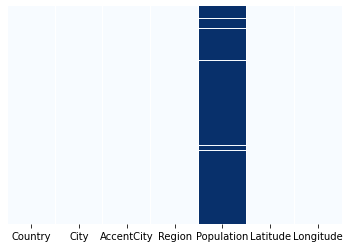

In [44]:
# Ver datos faltantes, variable population con una gran cantidad de NAN
sns.heatmap(data.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

In [74]:
data.isna().sum()

Country       0
City          0
AccentCity    0
Region        0
Latitude      0
Longitude     0
dtype: int64

In [61]:
data[data['Population'].isnull()]

,Country,City,AccentCity,Region,Population,Latitude,Longitude
0,ad,aixas,Aixàs,6,NaN,42.483333,1.466667
1,ad,aixirivali,Aixirivali,6,NaN,42.466667,1.500000
2,ad,aixirivall,Aixirivall,6,NaN,42.466667,1.500000
3,ad,aixirvall,Aixirvall,6,NaN,42.466667,1.500000
4,ad,aixovall,Aixovall,6,NaN,42.466667,1.483333
...,...,...,...,...,...,...,...
3173952,zw,zimbabwe,Zimbabwe,7,NaN,-20.266667,30.916667
3173953,zw,zimre park,Zimre Park,4,NaN,-17.866111,31.213611
3173954,zw,ziyakamanas,Ziyakamanas,0,NaN,-18.216667,27.950000
3173955,zw,zizalisari,Zizalisari,4,NaN,-17.758889,31.010556


In [68]:
data[data['City'].isnull()]

,Country,City,AccentCity,Region,Latitude,Longitude
98581,al,NaN,Nan,47,42.011667,20.416389
545196,cn,NaN,Nan,11,29.359551,112.402433
959881,fr,NaN,Nan,A1,47.374053,4.358566
1348414,in,NaN,Nan,12,32.994444,74.347222
2133528,ph,NaN,Nan,H2,13.912500,122.172600
2753400,th,NaN,Nan,4,18.792917,100.729722


In [69]:
data[data['Region'].isnull()]

,Country,City,AccentCity,Region,Latitude,Longitude
55166,af,nazand,Nazand,NaN,32.400278,69.254722
79529,af,soripai narai,Soripai Narai,NaN,33.044444,69.516667
1318396,il,bayt safafa,Bayt Safafa,NaN,31.742667,35.203036
1318491,il,beit safafa,Beit Safafa,NaN,31.742667,35.203036
2220223,pk,nazand,Nazand,NaN,32.400278,69.254722
2235464,pk,soripai narai,Soripai Narai,NaN,33.044444,69.516667
2588960,sd,kajra,Kajra,NaN,17.251944,34.488056
2651070,sn,taba treich,Taba Treich,NaN,16.158611,-16.382500


In [63]:
#Al haber gran cantidad de NAN para la variable Population (Superior al 98%) no tiene sentido analizar y las filas NAN de Region (), City () se eliminan igualmente
#Elimando columna Population
data.drop(["Population"], axis = 1, inplace = True)

In [73]:
#Elimando filas Region y City con NAN, ya que no alterarian el análisis final
data.drop(data[data.Region.isnull()].index, inplace = True)
data.drop(data[data.City.isnull()].index, inplace = True)

In [67]:
data

,Country,City,AccentCity,Region,Latitude,Longitude
0,ad,aixas,Aixàs,6,42.483333,1.466667
1,ad,aixirivali,Aixirivali,6,42.466667,1.500000
2,ad,aixirivall,Aixirivall,6,42.466667,1.500000
3,ad,aixirvall,Aixirvall,6,42.466667,1.500000
4,ad,aixovall,Aixovall,6,42.466667,1.483333
...,...,...,...,...,...,...
3173953,zw,zimre park,Zimre Park,4,-17.866111,31.213611
3173954,zw,ziyakamanas,Ziyakamanas,0,-18.216667,27.950000
3173955,zw,zizalisari,Zizalisari,4,-17.758889,31.010556
3173956,zw,zuzumba,Zuzumba,6,-20.033333,27.933333
